In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df=df.iloc[:,2:]

In [6]:
df.sample(7)

,Age,EstimatedSalary,Purchased
139,19,25000,0
112,38,61000,0
20,45,22000,1
192,29,43000,0
378,41,87000,1
68,22,63000,0
173,34,43000,0


Train-test split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

STANDARD SCALER CLASS

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler toi the train set,it will learn the parameter
scaler.fit(X_train)
#transfrom train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [17]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [18]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


EFFECT OF SCALING

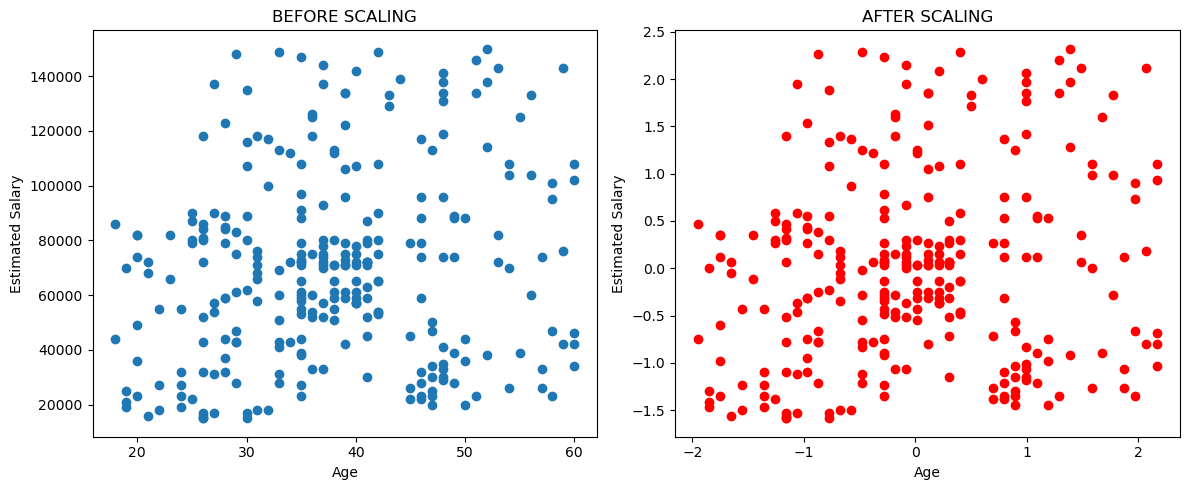

In [22]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("BEFORE SCALING")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("AFTER SCALING")
ax2.set_xlabel("Age")
ax2.set_ylabel("Estimated Salary")
plt.tight_layout()
plt.show()

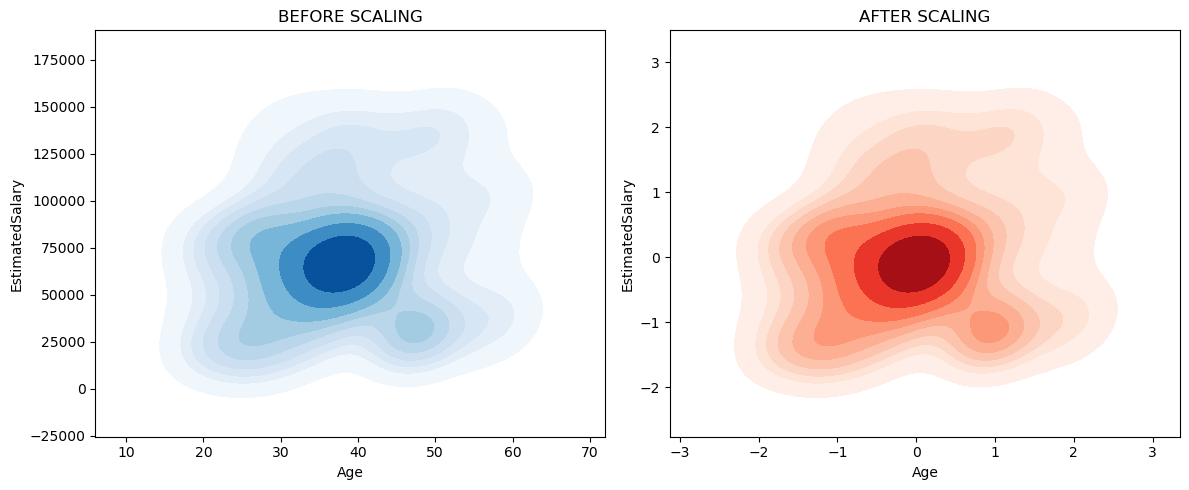

In [24]:



fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# BEFORE SCALING
sns.kdeplot(
    x=X_train['Age'],
    y=X_train['EstimatedSalary'],
    fill=True,
    cmap='Blues',
    ax=ax1
)
ax1.set_title("BEFORE SCALING")

# AFTER SCALING
sns.kdeplot(
    x=X_train_scaled['Age'],
    y=X_train_scaled['EstimatedSalary'],
    fill=True,
    cmap='Reds',
    ax=ax2
)
ax2.set_title("AFTER SCALING")

plt.tight_layout()
plt.show()